# Phase 1: Problem Definition
## Understand Objectives
### Problem Statement
_To analyze and model the relationship between specific audio features and song popularity, aiming to identify the most influential features and develop a robust predictive model, thereby providing actionable insights for the music industry and contributing to academic research._
### Success Criteria
- Achieving an adjusted R-squared > 0.8.
- RMSE and MAE below acceptable thresholds established after data exploration.
- Statistical significance of key predictors at the 0.05 significance level.

# Phase 2: Data Acquisition and Understanding

In [2]:

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from scipy.stats import boxcox

# Import deepcopy function
from copy import deepcopy

## Data Collection
We have collected a raw dataset named ["Most Streamed Spotify Songs 2023"](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023) on Kaggle.

## Data Understanding

### Explore Data Structure

In [3]:
# Data loading
spotify_2023_df = pd.read_csv('../data/raw/spotify-2023.csv', encoding='latin-1')
spotify_2023_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
spotify_2023_df.tail()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,90,E,Minor,61,32,67,15,0,11,5


In [5]:
spotify_2023_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [6]:
spotify_2023_df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


### Split the Data in Train and Test Set

In [7]:
raw_data_path = '../data/raw'

In [8]:
# # Split the data into training and test sets
# from sklearn.model_selection import train_test_split

# train_set, test_set = train_test_split(spotify_2023_df, test_size=0.15, random_state=42)

# # Save the train_set and test_set in .csv files

# train_set.to_csv(f'{raw_data_path}/train_set.csv', index=False)
# test_set.to_csv(f'{raw_data_path}/test_set.csv', index=False)

In [9]:
# Read the train set
train_set = pd.read_csv(f"{raw_data_path}/train_set.csv",)
train_set.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Peru,"Ed Sheeran, Fireboy DML",2,2021,12,23,2999,0,261286503,60,...,108,G,Minor,96,71,42,57,0,8,9
1,Fuera del mercado,Danny Ocean,1,2022,2,17,2499,21,421365166,68,...,92,G#,Major,45,27,67,32,0,13,14
2,Sobrio,Maluma,1,2021,7,8,3506,10,513643924,103,...,178,F,Major,76,63,77,14,0,15,22
3,"Tere Vaaste (From ""Zara Hatke Zara Bachke"")","Sachin-Jigar, Shadab Faridi, Altamash Faridi, ...",5,2023,5,22,182,8,54225632,3,...,110,G,Minor,76,96,72,32,0,9,4
4,Murder In My Mind,Kordhell,1,2022,1,21,2459,20,448843705,20,...,120,A#,Major,71,57,97,1,0,13,11


In [10]:
train_set.shape

(810, 24)

### Drop Unimportant Columns

- Based on the problem that we're trying to model, there're columns that we don't need.
- To predict the streams of an un-released track, these columns are things we don't need:
    - `released_year`
    - `released_month`
    - `released_day`
    - `in_spotify_playlists`
    - `in_spotify_charts`
    - `in_apple_playlists`
    - `in_apple_charts`
    - `in_apple_charts`
    - `in_deezer_playlists`
    - `in_deezer_charts`
    - `in_shazam_charts`

In [11]:
# Define the list of columns
columns_to_drop = [
    'released_year',
    'released_month',
    'released_day',
    'in_spotify_playlists',
    'in_spotify_charts',
    'in_apple_playlists',
    'in_apple_charts',
    'in_deezer_playlists',
    'in_deezer_charts',
    'in_shazam_charts',
]

# Drop those columns
train_set = train_set.drop(columns=columns_to_drop)

# Check the result
train_set.head()

,track_name,artist(s)_name,artist_count,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Peru,"Ed Sheeran, Fireboy DML",2,261286503,108,G,Minor,96,71,42,57,0,8,9
1,Fuera del mercado,Danny Ocean,1,421365166,92,G#,Major,45,27,67,32,0,13,14
2,Sobrio,Maluma,1,513643924,178,F,Major,76,63,77,14,0,15,22
3,"Tere Vaaste (From ""Zara Hatke Zara Bachke"")","Sachin-Jigar, Shadab Faridi, Altamash Faridi, ...",5,54225632,110,G,Minor,76,96,72,32,0,9,4
4,Murder In My Mind,Kordhell,1,448843705,120,A#,Major,71,57,97,1,0,13,11


### Rename Columns

In [12]:
need_to_be_removed_chars = ['_', '%']

# Remove the characters from the column names
train_set.columns = train_set.columns.str.replace('_', ' ')
train_set.columns = train_set.columns.str.replace('%', 'percentage')

# Check the result
train_set.head()

,track name,artist(s) name,artist count,streams,bpm,key,mode,danceability percentage,valence percentage,energy percentage,acousticness percentage,instrumentalness percentage,liveness percentage,speechiness percentage
0,Peru,"Ed Sheeran, Fireboy DML",2,261286503,108,G,Minor,96,71,42,57,0,8,9
1,Fuera del mercado,Danny Ocean,1,421365166,92,G#,Major,45,27,67,32,0,13,14
2,Sobrio,Maluma,1,513643924,178,F,Major,76,63,77,14,0,15,22
3,"Tere Vaaste (From ""Zara Hatke Zara Bachke"")","Sachin-Jigar, Shadab Faridi, Altamash Faridi, ...",5,54225632,110,G,Minor,76,96,72,32,0,9,4
4,Murder In My Mind,Kordhell,1,448843705,120,A#,Major,71,57,97,1,0,13,11


### Assess Data Quality

#### Missing Values

In [13]:
train_set.isnull().sum()

track name                      0
artist(s) name                  0
artist count                    0
streams                         0
bpm                             0
key                            81
mode                            0
danceability percentage         0
valence percentage              0
energy percentage               0
acousticness percentage         0
instrumentalness percentage     0
liveness percentage             0
speechiness percentage          0
dtype: int64

- By observation, we can see that there're just some missing values need to be handled. We will tackle these in the substep of handling missing data in Phase 3: Data Preparation.

#### Duplicates

In [14]:
# Drop the duplicated rows
train_set = train_set.drop_duplicates()

- TODO: Report the data shape before and after dropping duplicates.

#### Outliers and Anomalies

In [15]:
# Inspect the data type of each column
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 809 entries, 0 to 809
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   track name                   809 non-null    object
 1   artist(s) name               809 non-null    object
 2   artist count                 809 non-null    int64 
 3   streams                      809 non-null    object
 4   bpm                          809 non-null    int64 
 5   key                          728 non-null    object
 6   mode                         809 non-null    object
 7   danceability percentage      809 non-null    int64 
 8   valence percentage           809 non-null    int64 
 9   energy percentage            809 non-null    int64 
 10  acousticness percentage      809 non-null    int64 
 11  instrumentalness percentage  809 non-null    int64 
 12  liveness percentage          809 non-null    int64 
 13  speechiness percentage       809 no

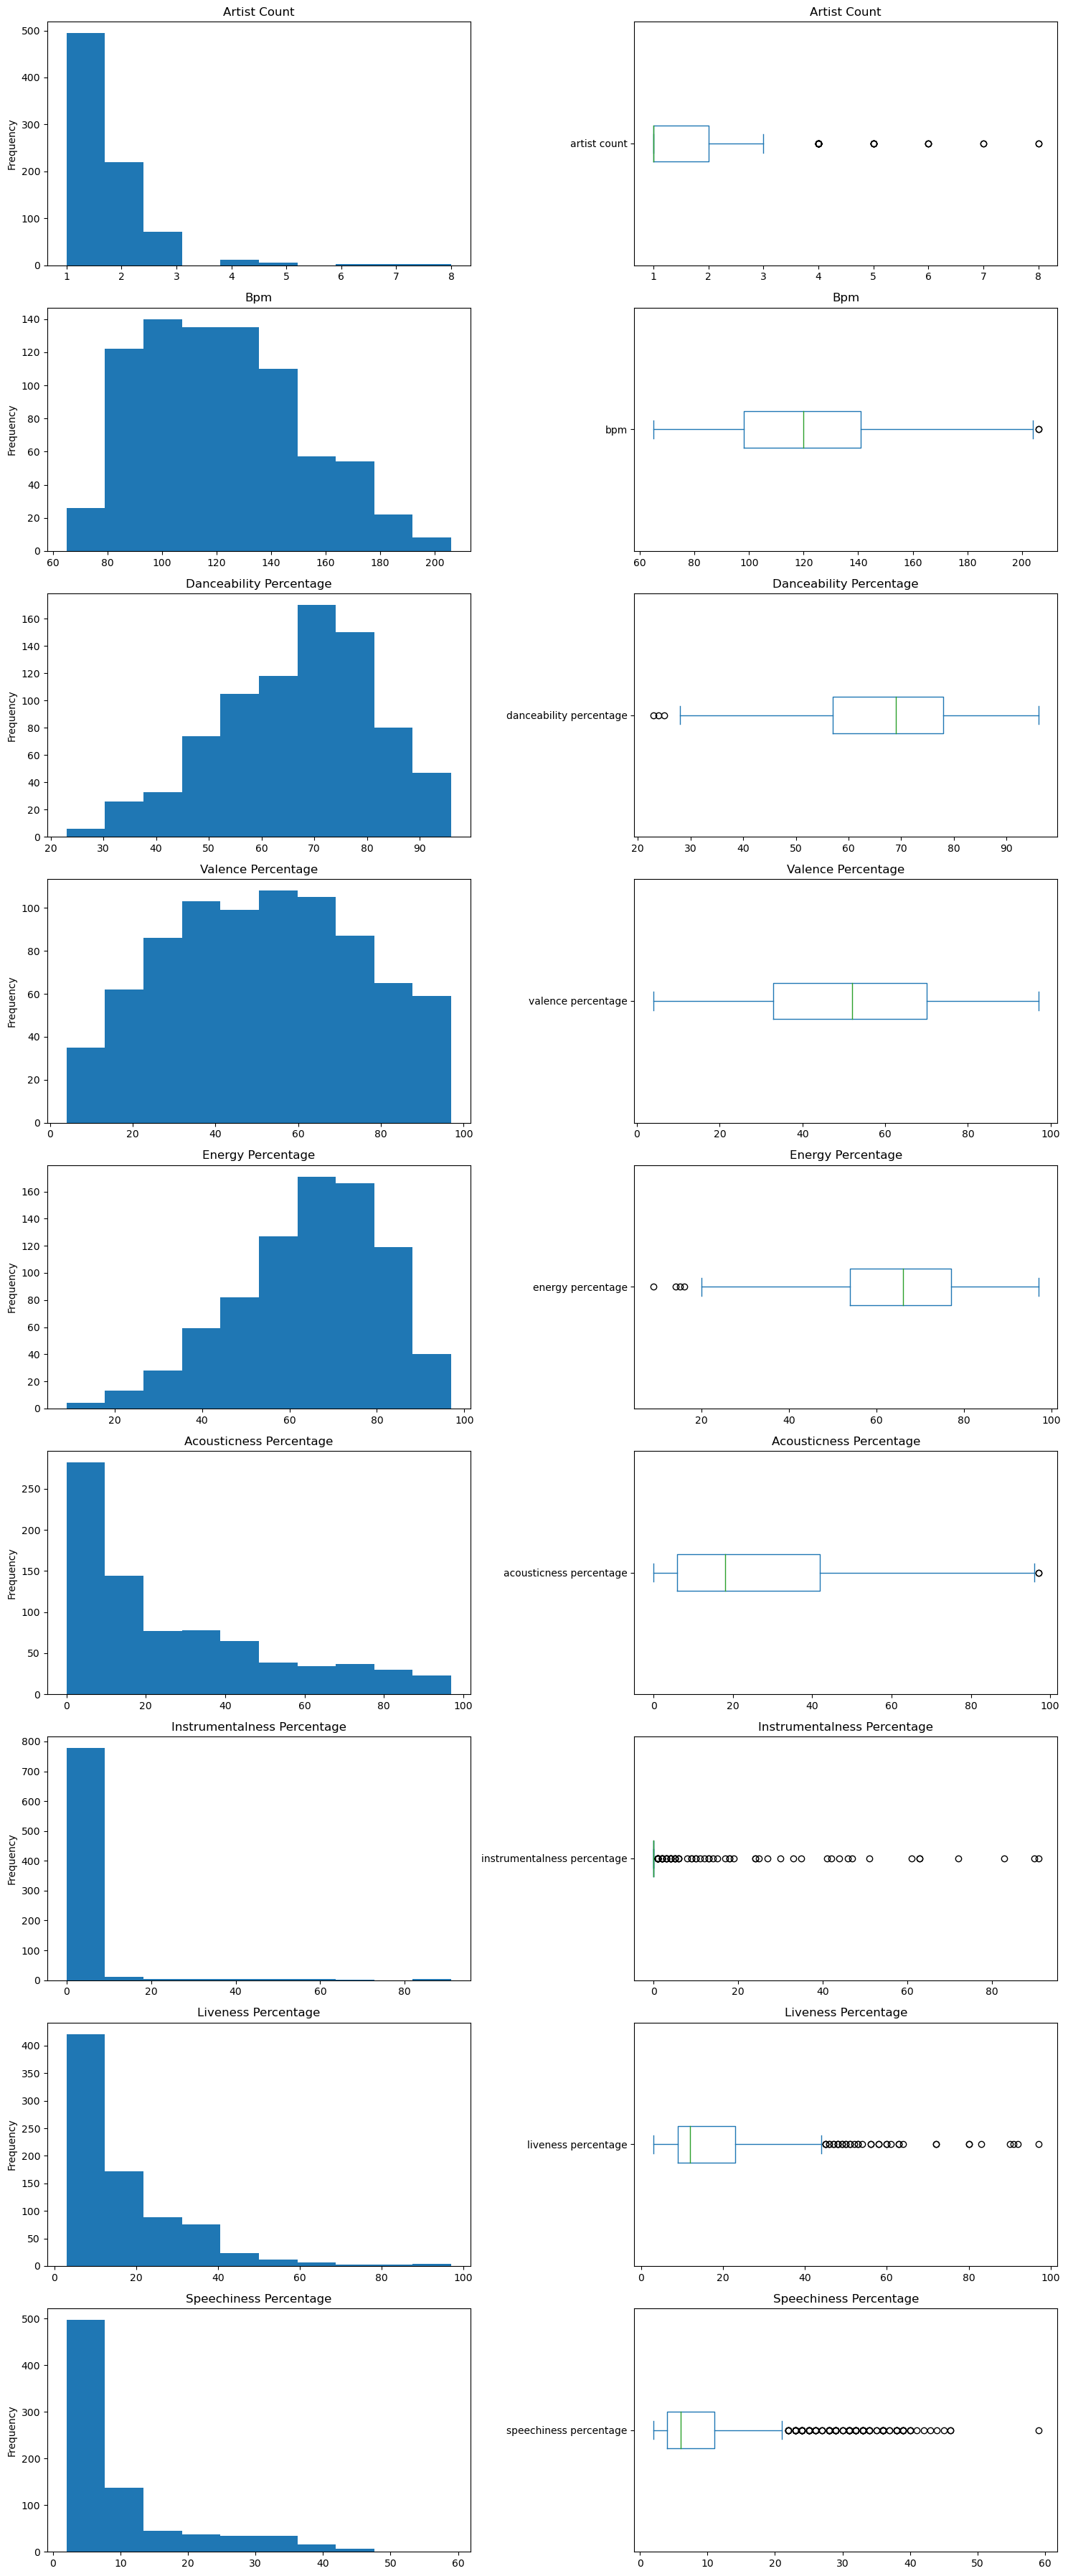

In [16]:
# Get the column name of numerical columns
numerical_columns = train_set.select_dtypes(include=['int64', 'float64']).columns

# For each columns plot a histogram and a boxplot horizontally side by side
fig, axs = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(15, 36))

for i, col in enumerate(numerical_columns):
    train_set[col].plot(kind='hist', ax=axs[i, 0], title=col.title())
    train_set[col].plot(kind='box', ax=axs[i, 1], title=col.title(), vert=False)
    
plt.tight_layout()

- Furthermore, because we cannot observe clearly the boxplot for `artist count` and `instrumentalness percentage`, I will plot them again below.

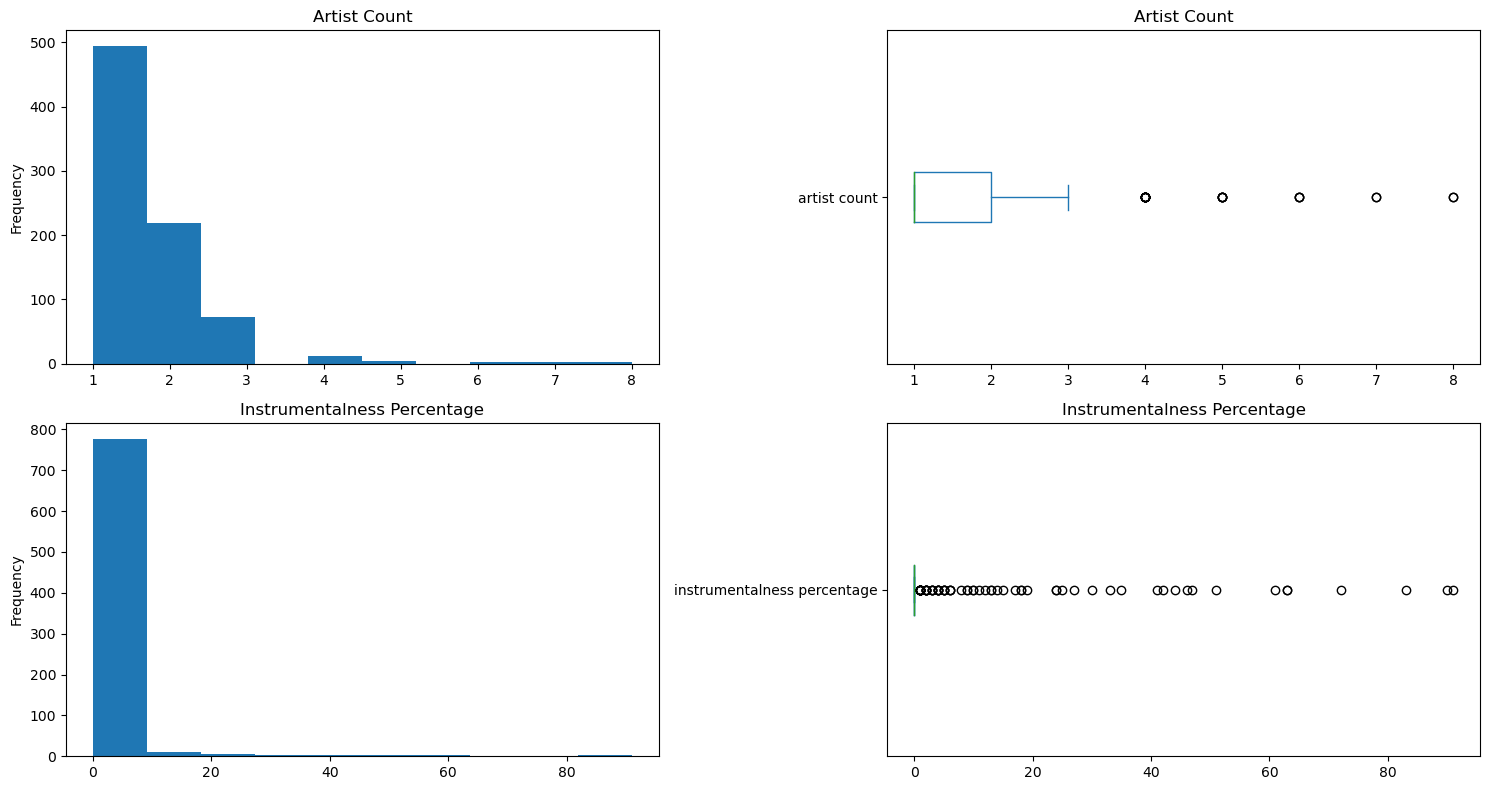

In [17]:
# Plot histogram and boxplot for `Artist Count` and `Instrumentalness Percentage` side-by-side separately
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

train_set['artist count'].plot(kind='hist', ax=axs[0, 0], title='Artist Count')
train_set['artist count'].plot(kind='box', ax=axs[0, 1], title='Artist Count', vert=False)

train_set['instrumentalness percentage'].plot(kind='hist', ax=axs[1, 0], title='Instrumentalness Percentage')
train_set['instrumentalness percentage'].plot(kind='box', ax=axs[1, 1], title='Instrumentalness Percentage', vert=False)

plt.tight_layout();

- Looking at the histogram for the `instrumentalness percentage`, we can (loosely) infer that this column doesn't contain much information that's helpful for the learning process of the models. Therefore, we will drop it.

In [18]:
train_set.drop(columns=['instrumentalness percentage'], inplace=True)

In [19]:
def plot_histogram_and_boxplot(data, column):
    """
    This function plots a histogram and a boxplot for a numerical column in a dataset.

    Parameters:
    data (pandas.DataFrame): The dataset to be used.
    column (str): The name of the numerical column to be plotted.

    Returns:
    None
    """
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
    
    data[column].plot(kind='hist', ax=axs[0], title=column)
    data[column].plot(kind='box', ax=axs[1], title=column, vert=False)

    plt.tight_layout()

# Phase 3: Data Preparation

- By observing the histograms and boxplots we have created above, we can see that there're columns have skewed to very skewed distributions. There are also lots of columns with outliers we need to handle. But firstly, we will handle the missing values by imputing or removing them.
- In this dataset, there's only 1 column having missing values we need to handle: the `key` column.
- Since the `key` of a song cannot be infered using information from other songs, we will fill missing keys with `unknown`.

## Data Cleaning

#### Handle Missing Data

In [20]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 809 entries, 0 to 809
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   track name               809 non-null    object
 1   artist(s) name           809 non-null    object
 2   artist count             809 non-null    int64 
 3   streams                  809 non-null    object
 4   bpm                      809 non-null    int64 
 5   key                      728 non-null    object
 6   mode                     809 non-null    object
 7   danceability percentage  809 non-null    int64 
 8   valence percentage       809 non-null    int64 
 9   energy percentage        809 non-null    int64 
 10  acousticness percentage  809 non-null    int64 
 11  liveness percentage      809 non-null    int64 
 12  speechiness percentage   809 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 88.5+ KB


In [21]:
train_set['key'] = train_set['key'].fillna('unknown')

- When cleaning the test set, on columns like `key` and `mode`, if there's a value doesn't exist in the train set, we will replace it with `unknown`.

In [22]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 809 entries, 0 to 809
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   track name               809 non-null    object
 1   artist(s) name           809 non-null    object
 2   artist count             809 non-null    int64 
 3   streams                  809 non-null    object
 4   bpm                      809 non-null    int64 
 5   key                      809 non-null    object
 6   mode                     809 non-null    object
 7   danceability percentage  809 non-null    int64 
 8   valence percentage       809 non-null    int64 
 9   energy percentage        809 non-null    int64 
 10  acousticness percentage  809 non-null    int64 
 11  liveness percentage      809 non-null    int64 
 12  speechiness percentage   809 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 88.5+ KB


- Okay, now all the missing values were handled. Next, we need to address inconsistencies in the data.

#### Address Inconsistencies

In [23]:
# Before addressing inconsistencies, let's inspect the dataset once.
train_set.head()

,track name,artist(s) name,artist count,streams,bpm,key,mode,danceability percentage,valence percentage,energy percentage,acousticness percentage,liveness percentage,speechiness percentage
0,Peru,"Ed Sheeran, Fireboy DML",2,261286503,108,G,Minor,96,71,42,57,8,9
1,Fuera del mercado,Danny Ocean,1,421365166,92,G#,Major,45,27,67,32,13,14
2,Sobrio,Maluma,1,513643924,178,F,Major,76,63,77,14,15,22
3,"Tere Vaaste (From ""Zara Hatke Zara Bachke"")","Sachin-Jigar, Shadab Faridi, Altamash Faridi, ...",5,54225632,110,G,Minor,76,96,72,32,9,4
4,Murder In My Mind,Kordhell,1,448843705,120,A#,Major,71,57,97,1,13,11


In [24]:
# For all string columns, standardize the text by converting them into lowercase
# and remove leading and trailing whitespaces
string_columns = train_set.select_dtypes(include=['object']).columns

for col in string_columns:
    train_set[col] = train_set[col].str.lower().str.strip()
    
# Check the result
train_set.head()

,track name,artist(s) name,artist count,streams,bpm,key,mode,danceability percentage,valence percentage,energy percentage,acousticness percentage,liveness percentage,speechiness percentage
0,peru,"ed sheeran, fireboy dml",2,261286503,108,g,minor,96,71,42,57,8,9
1,fuera del mercado,danny ocean,1,421365166,92,g#,major,45,27,67,32,13,14
2,sobrio,maluma,1,513643924,178,f,major,76,63,77,14,15,22
3,"tere vaaste (from ""zara hatke zara bachke"")","sachin-jigar, shadab faridi, altamash faridi, ...",5,54225632,110,g,minor,76,96,72,32,9,4
4,murder in my mind,kordhell,1,448843705,120,a#,major,71,57,97,1,13,11


In [25]:
# Store the unique values of the `key` and `mode` column
unique_keys = list(train_set['key'].unique())
print(unique_keys)

unique_modes = list(train_set['mode'].unique())
print(unique_modes)

['g', 'g#', 'f', 'a#', 'unknown', 'd', 'e', 'b', 'a', 'f#', 'c#', 'd#']
['minor', 'major']


In [26]:
# Create a deepcopy of train_set
raw_train_set = deepcopy(train_set)

#### Hanlde Outliers

In [27]:
# Loop over numerical columns, calculate IQR and the percentage of outliers
numerical_columns = train_set.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    q1 = train_set[col].quantile(0.25)
    q3 = train_set[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    n_outliers = ((train_set[col] < lower_bound) | (train_set[col] > upper_bound)).sum()
    perc_outliers = (n_outliers / train_set.shape[0]) * 100
    
    print(f'{col} -- {perc_outliers:.2f}%')

artist count -- 2.97%
bpm -- 0.25%
danceability percentage -- 0.37%
valence percentage -- 0.00%
energy percentage -- 0.49%
acousticness percentage -- 0.25%
liveness percentage -- 4.82%
speechiness percentage -- 14.09%


Because the proportion of outliers in these above columns are not significant, we think it's safe to drop all of them.

In [28]:
# Loop over numerical columns, calculate IQR and remove outliers
for col in numerical_columns:
    q1 = train_set[col].quantile(0.25)
    q3 = train_set[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    train_set = train_set[(train_set[col] >= lower_bound) & (train_set[col] <= upper_bound)]
    
# Check the result
train_set.shape

(639, 13)

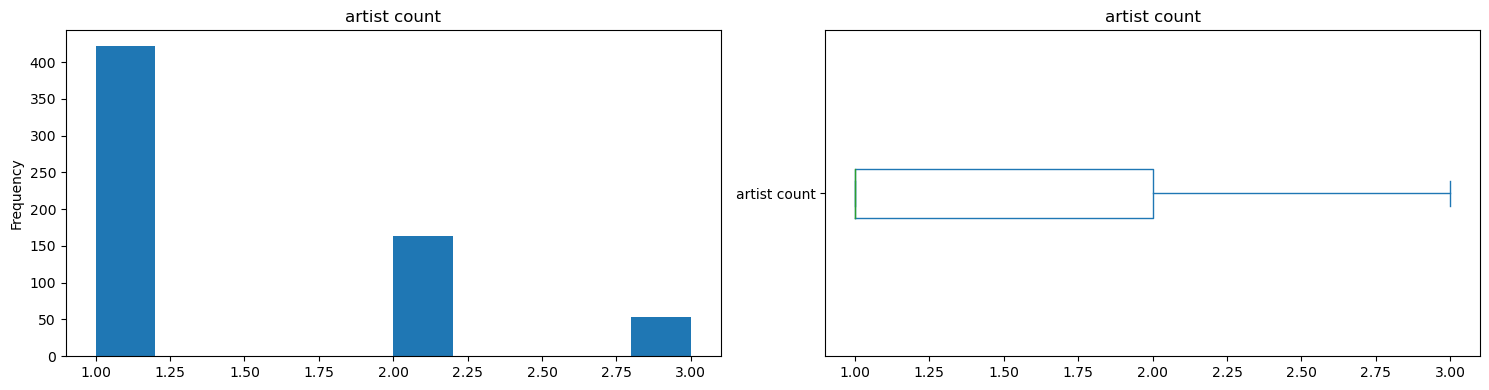

In [29]:
plot_histogram_and_boxplot(train_set, 'artist count')

In [30]:
# Get numerical columns
numerical_columns = train_set.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['artist count', 'bpm', 'danceability percentage', 'valence percentage',
       'energy percentage', 'acousticness percentage', 'liveness percentage',
       'speechiness percentage'],
      dtype='object')

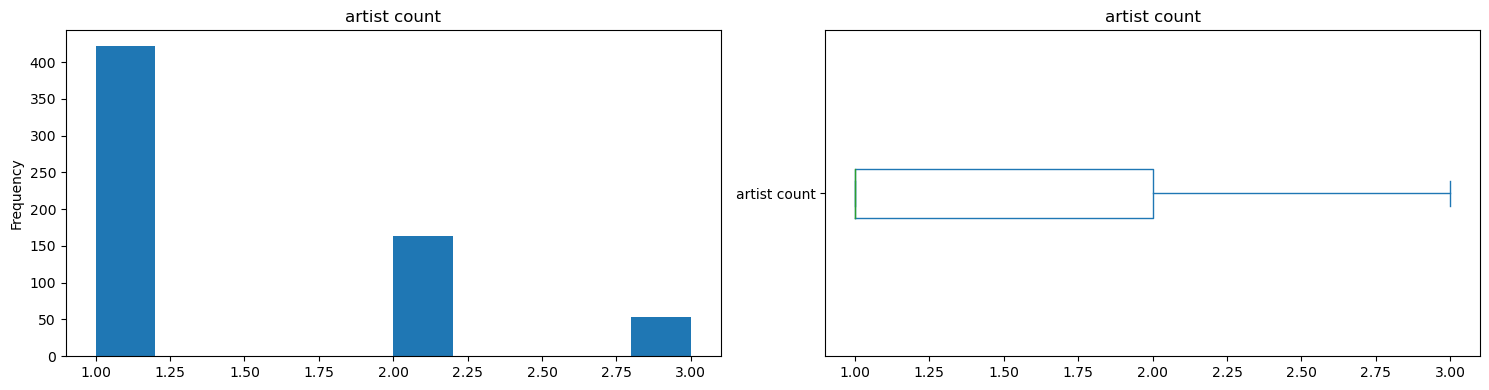

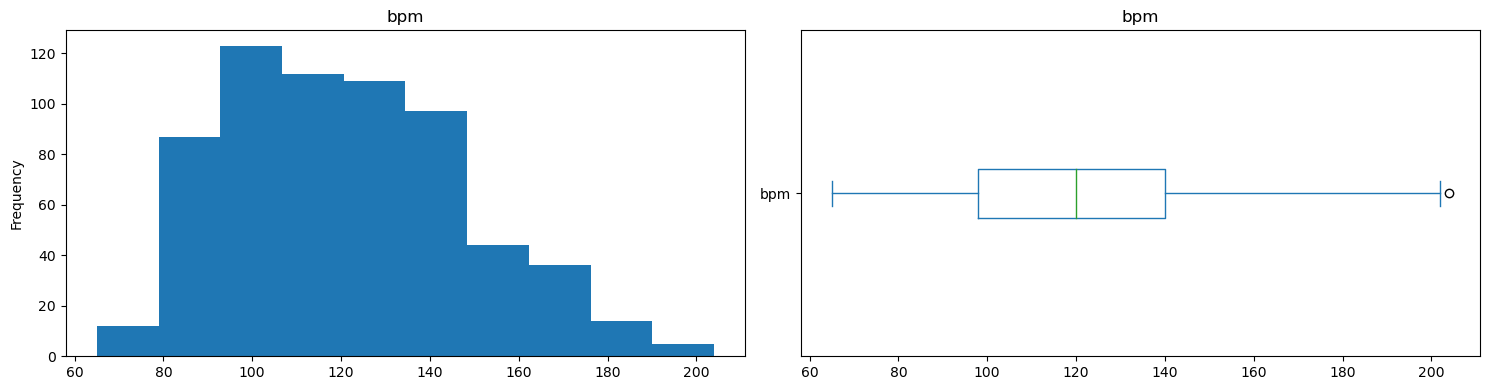

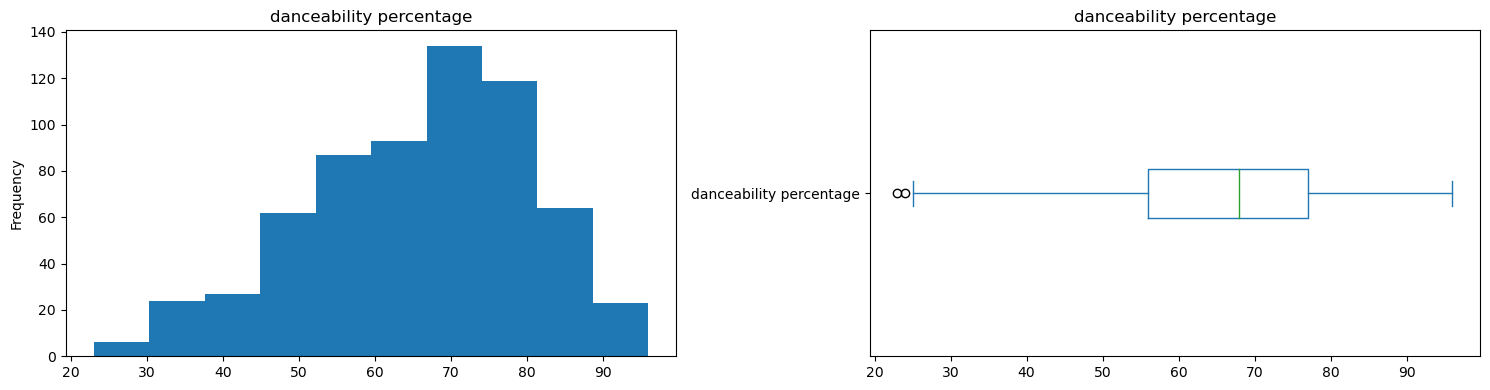

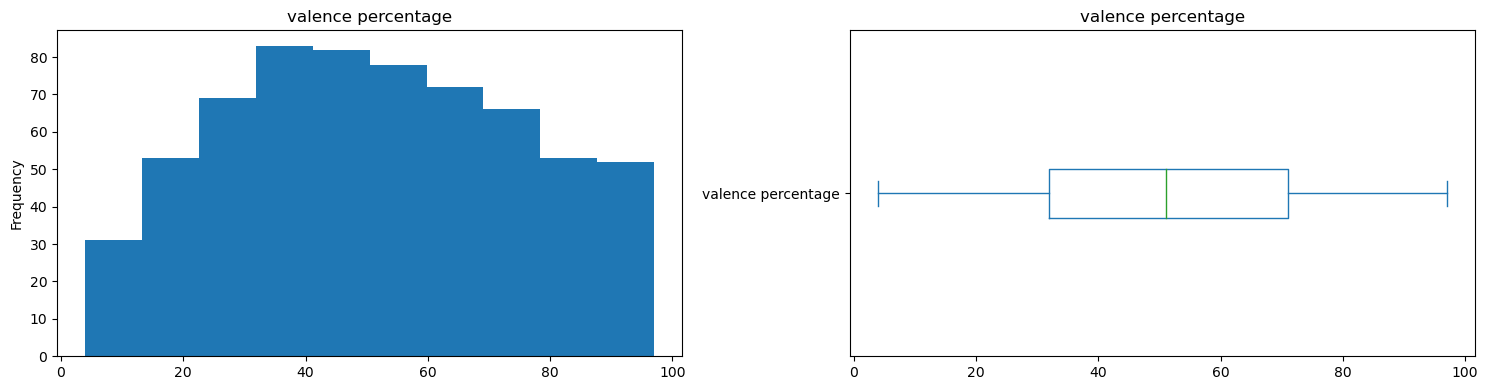

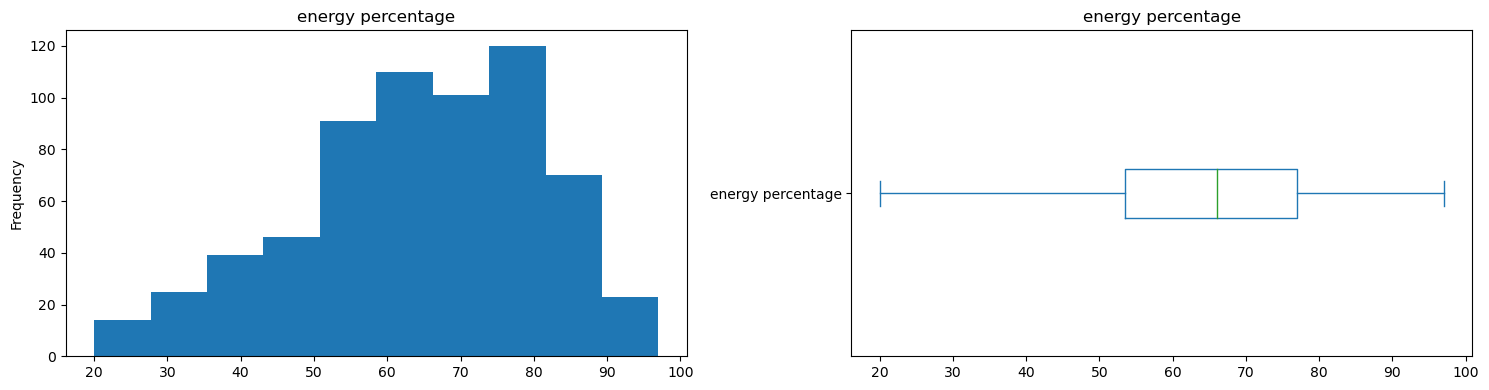

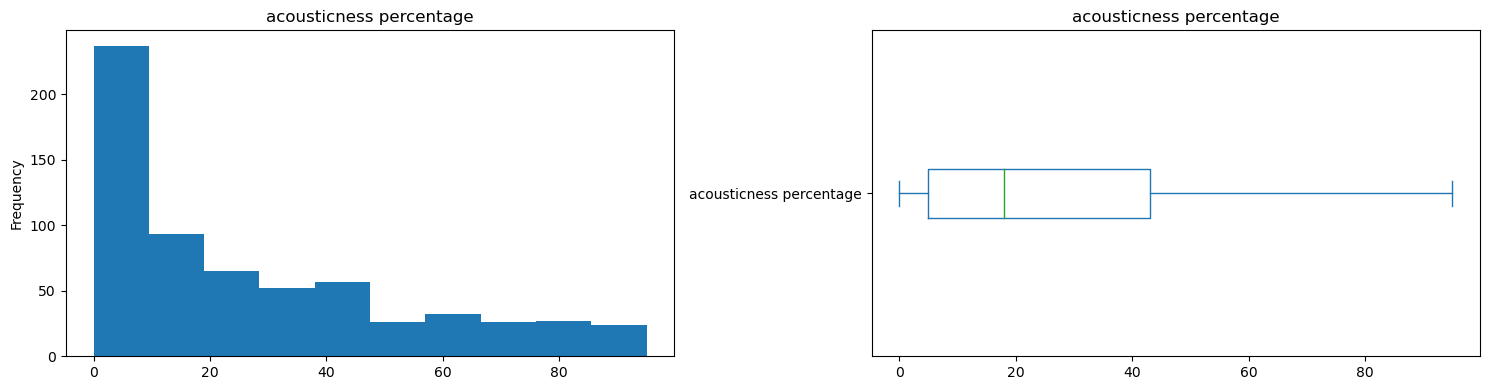

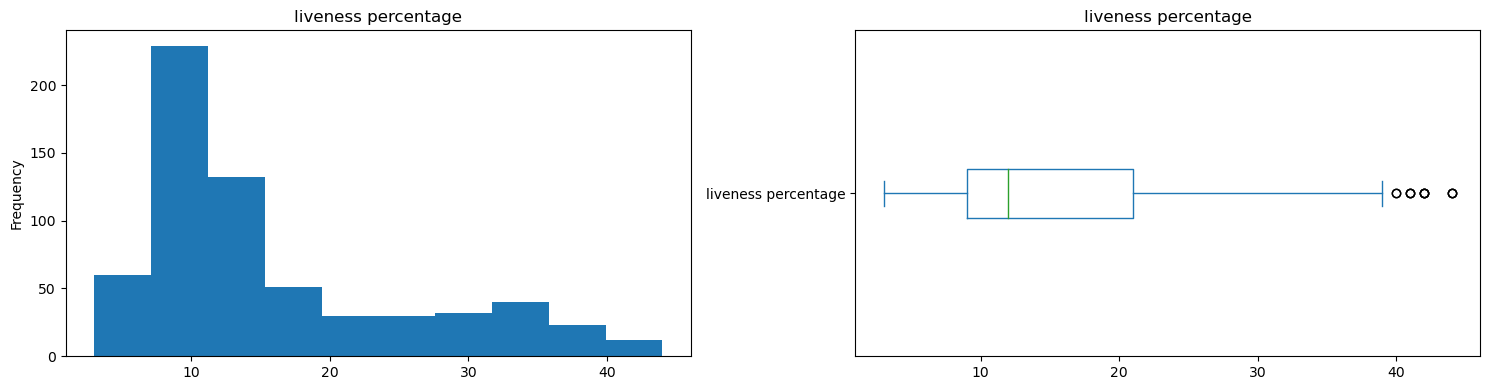

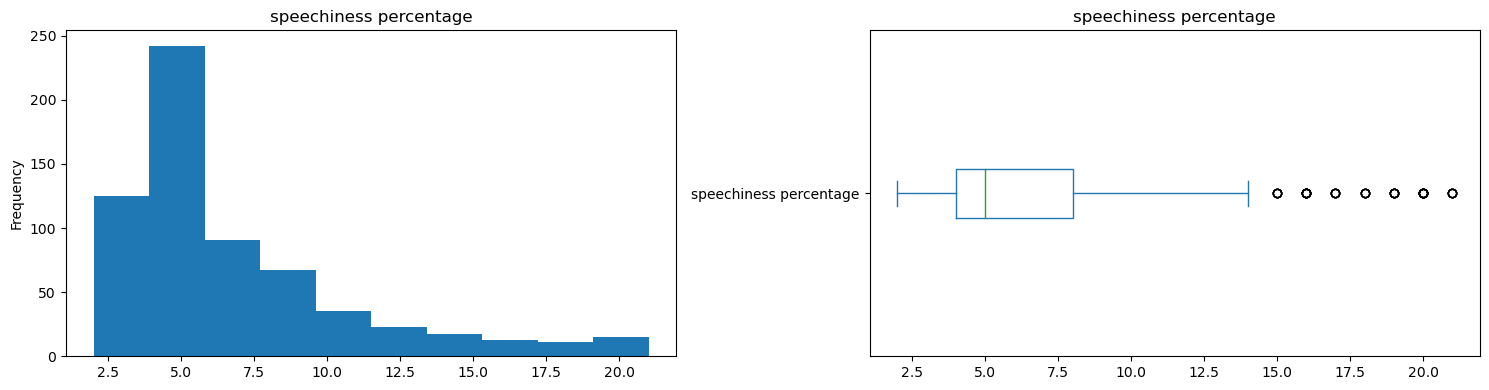

In [31]:
# Plot histogram and boxplot for numerical columns
for col in numerical_columns:
    plot_histogram_and_boxplot(train_set, col)

- At this point, we can see that most of the columns are outlier-free. Hooray!

In [32]:
def clean_test_data(dataset: pd.DataFrame) -> pd.DataFrame:
    dataset = dataset.drop(columns=columns_to_drop)
    
    # Remove the characters from the column names
    dataset.columns = dataset.columns.str.replace('_', ' ')
    dataset.columns = dataset.columns.str.replace('%', 'percentage')
    
    # Address Inconsistencies
    # For all string columns, standardize the text by converting them into lowercase
    # and remove leading and trailing whitespaces
    string_columns = train_set.select_dtypes(include=['object']).columns

    for col in string_columns:
        train_set[col] = train_set[col].str.lower().str.strip()
        
    # Drop `instrumentalness percentage`
    
    # When cleaning the test set, on columns like `key` and `mode`, 
    # if there's a value doesn't exist in the train set, we will replace it with `unknown`.
    dataset['key'] = dataset['key'].fillna('unknown').apply(lambda x: 'unknown' if x not in unique_keys else x)
    dataset['mode'] = dataset['mode'].fillna('unknown').apply(lambda x: 'unknown' if x not in unique_modes else x)
    
    return dataset

In [33]:
# Read the test_set
test_set = pd.read_csv(f"{raw_data_path}/test_set.csv")

# Try if we can clean the test dataset with the function above
cleaned_test_set = clean_test_data(test_set)
cleaned_test_set.head()

,track name,artist(s) name,artist count,streams,bpm,key,mode,danceability percentage,valence percentage,energy percentage,acousticness percentage,instrumentalness percentage,liveness percentage,speechiness percentage
0,Take On Me,a-ha,1,1479115056,84,unknown,unknown,57,86,90,2,0,9,5
1,Rumble,"Skrillex, Flowdan, Fred again..",3,78489819,140,unknown,unknown,81,6,84,5,23,6,6
2,NEW MAGIC WAND,"Tyler, The Creator",2,461437791,140,unknown,unknown,62,46,73,10,0,67,11
3,Falling,Harry Styles,1,1023187129,110,unknown,unknown,57,6,27,84,0,9,3
4,Pepas,Farruko,1,1309887447,130,unknown,unknown,76,44,77,1,0,13,3


In [34]:
# Check unique values of `Key` and `Mode` columns
cleaned_test_set['key'].unique(), cleaned_test_set['mode'].unique()

(array(['unknown'], dtype=object), array(['unknown'], dtype=object))

## Data Transformation

- Okay now the `train_set` is cleaned. Next, we need to perform some transformation on the dataset to help the models easily learn the patterns of the data later.
- Notes: All transformations that are performed on the target feature - which is the `streams` column - need to be reversible.

### Data Type Conversion

In [35]:
def is_integer_string(string: str) -> bool:
    if string[0] in ('-', '+'):
        return string[1:].isdigit()
    
    else:
        return string.isdigit()
    
train_set = train_set[train_set['streams'].apply(is_integer_string)]
train_set['streams'] = train_set['streams'].astype('int64')

### Encoding Categorical Variables

In [36]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638 entries, 0 to 809
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   track name               638 non-null    object
 1   artist(s) name           638 non-null    object
 2   artist count             638 non-null    int64 
 3   streams                  638 non-null    int64 
 4   bpm                      638 non-null    int64 
 5   key                      638 non-null    object
 6   mode                     638 non-null    object
 7   danceability percentage  638 non-null    int64 
 8   valence percentage       638 non-null    int64 
 9   energy percentage        638 non-null    int64 
 10  acousticness percentage  638 non-null    int64 
 11  liveness percentage      638 non-null    int64 
 12  speechiness percentage   638 non-null    int64 
dtypes: int64(9), object(4)
memory usage: 69.8+ KB


The `mode` column, is encoded as follows:
- Unknown: 0
- Major: 1
- Minor: 2

In [37]:
train_set['mode'] = (train_set['mode']
                    .replace('unknown', 0)
                    .replace('major', 1)
                    .replace('minor', 2))

The `key` mode is encoded as follows:
1. Convert the key into a numerical format: Assign a numerical index to each key: C=0, C#=1, D=2, ..., A#=10, B=11.
2. Apply sine and cosine transformations: Use the formulas: $$x = \sin(\frac{2 \pi k}{12}), \quad y = \cos(\frac{2 \pi k}{12})$$ where k is the numerical index of the key.
3. Encoding the known and unknown keys:
- For known keys: Set the indicator to 0
- For unknown keys: Set the indicator to 1, and set sine and cosine values to 0
4. Assign the sine as $x$, cosine as $y$, and the indicator as above.

In [38]:
import numpy as np

keys = ['c', 'c#', 'd', 'd#', 'e', 'f', 'f#', 'g', 'g#', 'a', 'a#', 'b', 'unknown']

# Assign indices to known keys
key_to_index = {key: i for i, key in enumerate(keys[:-1])}

# Encode function
def encode_key(key):
    if key == 'unknown':
        return 0.0, 0.0, 1.0  # Unknown key encoding
    index = key_to_index[key]
    sine = np.sin(2 * np.pi * index / 12)
    cosine = np.cos(2 * np.pi * index / 12)
    return sine, cosine, 0.0  # Known key encoding

# Encode all keys
encoded_keys = {key: encode_key(key) for key in keys}

# Convert to DataFrame
keys_df = pd.DataFrame(encoded_keys, index=['sine', 'cosine', 'unknown']).sort_index().T
keys_df

,cosine,sine,unknown
c,1.000000e+00,0.000000e+00,0.0
c#,8.660254e-01,5.000000e-01,0.0
d,5.000000e-01,8.660254e-01,0.0
d#,6.123234e-17,1.000000e+00,0.0
e,-5.000000e-01,8.660254e-01,0.0
f,-8.660254e-01,5.000000e-01,0.0
f#,-1.000000e+00,1.224647e-16,0.0
g,-8.660254e-01,-5.000000e-01,0.0
g#,-5.000000e-01,-8.660254e-01,0.0
a,-1.836970e-16,-1.000000e+00,0.0


In [39]:
train_set['key_sine'] = train_set['key'].apply(lambda x: encoded_keys[x][0])
train_set['key_cosine'] = train_set['key'].apply(lambda x: encoded_keys[x][1])
train_set['key_unknown'] = train_set['key'].apply(lambda x: encoded_keys[x][2])
train_set.drop(columns=['key'], inplace=True)

In [40]:
# Check the result
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638 entries, 0 to 809
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   track name               638 non-null    object 
 1   artist(s) name           638 non-null    object 
 2   artist count             638 non-null    int64  
 3   streams                  638 non-null    int64  
 4   bpm                      638 non-null    int64  
 5   mode                     638 non-null    int64  
 6   danceability percentage  638 non-null    int64  
 7   valence percentage       638 non-null    int64  
 8   energy percentage        638 non-null    int64  
 9   acousticness percentage  638 non-null    int64  
 10  liveness percentage      638 non-null    int64  
 11  speechiness percentage   638 non-null    int64  
 12  key_sine                 638 non-null    float64
 13  key_cosine               638 non-null    float64
 14  key_unknown              6

### Feature Scaling

- By observing the histograms above, there're some points we can infer:
  - We don't need to do feature scaling on the `artist count` column because we think it's better to keep it as it is.
  - For columns having their shape close to be bell-shaped, we can apply `StandardScaler()` on them. Those columns are: `bpm`, `danceability percentage`, `valence percentage`, `energy percentage`.
  - For columns being heavily right-skewed, we can apply Box-Cox transformation on them. Those columns are: `acousticness percentage`, `liveness percentage`, `speechiness percentage`.

In [41]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638 entries, 0 to 809
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   track name               638 non-null    object 
 1   artist(s) name           638 non-null    object 
 2   artist count             638 non-null    int64  
 3   streams                  638 non-null    int64  
 4   bpm                      638 non-null    int64  
 5   mode                     638 non-null    int64  
 6   danceability percentage  638 non-null    int64  
 7   valence percentage       638 non-null    int64  
 8   energy percentage        638 non-null    int64  
 9   acousticness percentage  638 non-null    int64  
 10  liveness percentage      638 non-null    int64  
 11  speechiness percentage   638 non-null    int64  
 12  key_sine                 638 non-null    float64
 13  key_cosine               638 non-null    float64
 14  key_unknown              6

In [42]:
# Create StandardScaler object
standard_scaler = StandardScaler()

columns_to_standard_scale = [
    'bpm',
    'danceability percentage',
    'valence percentage',
    'energy percentage',
]

standard_scaler.fit(train_set[columns_to_standard_scale])
temp_df = pd.DataFrame(standard_scaler
                       .transform(train_set[columns_to_standard_scale]),
                       columns = columns_to_standard_scale)

# We have to reset the index, so that when matching the index, the values are assigned correctly.
# If not, the values will be assigned based on the index of the original dataset, leading to some NaN values.
train_set.reset_index(drop=True, inplace=True)
train_set[columns_to_standard_scale] = temp_df
train_set[columns_to_standard_scale].describe()

,bpm,danceability percentage,valence percentage,energy percentage
count,6.380000e+02,6.380000e+02,6.380000e+02,6.380000e+02
mean,1.962902e-16,-4.287758e-16,-7.795923e-17,-2.227407e-16
std,1.000785e+00,1.000785e+00,1.000785e+00,1.000785e+00
min,-2.085844e+00,-2.941764e+00,-1.985162e+00,-2.712056e+00
25%,-8.626091e-01,-6.835549e-01,-8.148840e-01,-6.809820e-01
50%,-4.711901e-02,1.376120e-01,-2.076680e-02,9.785077e-02
75%,6.942356e-01,7.534871e-01,8.151460e-01,7.697849e-01
max,3.066570e+00,2.053668e+00,1.901833e+00,1.991483e+00


In [43]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   track name               638 non-null    object 
 1   artist(s) name           638 non-null    object 
 2   artist count             638 non-null    int64  
 3   streams                  638 non-null    int64  
 4   bpm                      638 non-null    float64
 5   mode                     638 non-null    int64  
 6   danceability percentage  638 non-null    float64
 7   valence percentage       638 non-null    float64
 8   energy percentage        638 non-null    float64
 9   acousticness percentage  638 non-null    int64  
 10  liveness percentage      638 non-null    int64  
 11  speechiness percentage   638 non-null    int64  
 12  key_sine                 638 non-null    float64
 13  key_cosine               638 non-null    float64
 14  key_unknown              6

- We will use exactly this `standard_scaler` for the test_set later to ensure all datapoints are transformed uniformly.

In [44]:
columns_to_boxcox_transform = [
    'acousticness percentage',
    'liveness percentage',
    'speechiness percentage'
]
# Apply Box-Cox transformation on each column
for col in columns_to_boxcox_transform:
    train_set[col], lmbda = boxcox(train_set[col] + 1)
    
# Check the result
train_set[columns_to_boxcox_transform].describe()

,acousticness percentage,liveness percentage,speechiness percentage
count,638.000000,638.000000,638.000000
mean,4.125364,1.756417,0.903912
std,2.390840,0.201438,0.077782
min,0.000000,1.107519,0.701605
25%,2.229111,1.601615,0.856419
50%,4.248689,1.717186,0.896735
75%,6.106383,1.920298,0.966097
max,8.194503,2.144672,1.053774


In [45]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   track name               638 non-null    object 
 1   artist(s) name           638 non-null    object 
 2   artist count             638 non-null    int64  
 3   streams                  638 non-null    int64  
 4   bpm                      638 non-null    float64
 5   mode                     638 non-null    int64  
 6   danceability percentage  638 non-null    float64
 7   valence percentage       638 non-null    float64
 8   energy percentage        638 non-null    float64
 9   acousticness percentage  638 non-null    float64
 10  liveness percentage      638 non-null    float64
 11  speechiness percentage   638 non-null    float64
 12  key_sine                 638 non-null    float64
 13  key_cosine               638 non-null    float64
 14  key_unknown              6

- Now all the numerical features have `mean` around `0` and `std` around `1`.

### Feature Engineering

Two custom features we're going to add to are "Mood Index" and "Performance Intensity". However, we have to calculate its correlation with other features to see whether they are needed. The formulas for those are specified below.

In [46]:
mood_index = (train_set['valence percentage'] + train_set['energy percentage']) / 2
performance_intensity = train_set['liveness percentage'] * train_set['energy percentage']

In [47]:
from scipy.stats import pearsonr

def calculate_correlation(col1: pd.Series, col2: pd.Series) -> float:
    """
    This function calculates the Pearson correlation coefficient between two Series.

    Parameters:
    col1 (Series): The name of the first column.
    col2 (Series): The name of the second column.

    Returns:
    float: The Pearson correlation coefficient between the two columns.
    """
    correlation, _ = pearsonr(col1, col2)
    return correlation

In [48]:
print('Correlation of `mood index` with other columns (except `artist count`):')
for col in numerical_columns[1:]:
    correlation = calculate_correlation(mood_index, train_set[col])
    print(f'- {col} -- {correlation:.2f}')

print('Correlation of `performance intensity` with other columns (except `artist count`):')
for col in numerical_columns[1:]:
    correlation = calculate_correlation(performance_intensity, train_set[col])
    print(f'- {col} -- {correlation:.2f}')

Correlation of `mood index` with other columns (except `artist count`):
- bpm -- 0.05
- danceability percentage -- 0.42
- valence percentage -- 0.83
- energy percentage -- 0.83
- acousticness percentage -- -0.36
- liveness percentage -- -0.02
- speechiness percentage -- 0.20
Correlation of `performance intensity` with other columns (except `artist count`):
- bpm -- 0.05
- danceability percentage -- 0.26
- valence percentage -- 0.38
- energy percentage -- 0.99
- acousticness percentage -- -0.53
- liveness percentage -- 0.01
- speechiness percentage -- 0.18


After calculating their correlation, we see that they have high correlation with some features. Therefore, those features will not be added.

Thus, there are no additional features added.

### Address Multicollinearity

We calculate Variance Inflation Factor (VIF) for each column in the dataset. High VIF values indicate that there is multicollinearity in that column (which means it is not linearly independent). Columns with high VIF value will be eliminated.

As a rule of thumb, we choose the threshold of VIF value to be 10.

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df, features):
    """
    Calculate VIF for each feature in the dataset
    
    Parameters:
    -----------
    df : pandas DataFrame
        The input dataset
    features : list
        List of feature names to calculate VIF for
    
    Returns:
    --------
    pandas DataFrame
        DataFrame containing features and their VIF scores
    """
    # Create a dataframe with only the features
    X = df[features].copy()
    
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                       for i in range(X.shape[1])]
    
    # Sort by VIF value in descending order
    vif_data = vif_data.sort_values('VIF', ascending=False)
    
    return vif_data

calculate_vif(train_set, numerical_columns)

,Feature,VIF
7,speechiness percentage,59.058189
6,liveness percentage,55.442473
0,artist count,6.354879
5,acousticness percentage,5.746068
4,energy percentage,1.739555
3,valence percentage,1.455313
2,danceability percentage,1.450558
1,bpm,1.081491


Both `speechiness percentage` and `liveness percentage` have high VIF values. Thus, we eliminate them. 

In [50]:
train_set.drop(columns=['speechiness percentage', 'liveness percentage'], inplace=True)

In [51]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   track name               638 non-null    object 
 1   artist(s) name           638 non-null    object 
 2   artist count             638 non-null    int64  
 3   streams                  638 non-null    int64  
 4   bpm                      638 non-null    float64
 5   mode                     638 non-null    int64  
 6   danceability percentage  638 non-null    float64
 7   valence percentage       638 non-null    float64
 8   energy percentage        638 non-null    float64
 9   acousticness percentage  638 non-null    float64
 10  key_sine                 638 non-null    float64
 11  key_cosine               638 non-null    float64
 12  key_unknown              638 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 64.9+ KB


# Phase 4: Exploratory Data Analysis (EDA) 

## Correlation Analysis

Correlation matrix is used to assess whether a feature is affected by another.

Threshold of 0.7 is chosen.

In [52]:
# Calculate the correlation matrix
correlation_matrix = train_set.corr()

# Display the correlation matrix
abs(correlation_matrix) >= 0.7

/tmp/ipykernel_115872/1025441795.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_set.corr()


,artist count,streams,bpm,mode,danceability percentage,valence percentage,energy percentage,acousticness percentage,key_sine,key_cosine,key_unknown
artist count,True,False,False,False,False,False,False,False,False,False,False
streams,False,True,False,False,False,False,False,False,False,False,False
bpm,False,False,True,False,False,False,False,False,False,False,False
mode,False,False,False,True,False,False,False,False,False,False,False
danceability percentage,False,False,False,False,True,False,False,False,False,False,False
valence percentage,False,False,False,False,False,True,False,False,False,False,False
energy percentage,False,False,False,False,False,False,True,False,False,False,False
acousticness percentage,False,False,False,False,False,False,False,True,False,False,False
key_sine,False,False,False,False,False,False,False,False,True,False,False
key_cosine,False,False,False,False,False,False,False,False,False,True,False


Conclusion: no columns to drop.

## Normality Test

Using Sapiro-Wilk test for normality test. 

Null hypothesis is "samples come from a normally distributed population". Significance level is set to 0.05, if p-value is smaller than 0.05, the null hypothesis is rejected.

If the null hypothesis is not rejected, Linear Regression can be used to predict the number of streams.

In [53]:
from scipy.stats import shapiro

# Get numerical columns
numerical_columns = raw_train_set.select_dtypes(include=['int64', 'float64']).columns

# Perform Shapiro-Wilk test for normality
normality_results = {}
for col in numerical_columns:
    stat, p_value = shapiro(raw_train_set[col])
    normality_results[col] = {'Statistic': stat, 'p-value': p_value}

# Display the results
normality_results

{'artist count': {'Statistic': 0.6399196603609327,
  'p-value': 4.6156720830582537e-38},
 'bpm': {'Statistic': 0.9737564882736082, 'p-value': 7.006521126865391e-11},
 'danceability percentage': {'Statistic': 0.9801664741233768,
  'p-value': 5.071831950505197e-09},
 'valence percentage': {'Statistic': 0.9781341353213449,
  'p-value': 1.2025335532041255e-09},
 'energy percentage': {'Statistic': 0.9765104637059352,
  'p-value': 4.0333973713025915e-10},
 'acousticness percentage': {'Statistic': 0.8719626646335747,
  'p-value': 3.2997056531421777e-25},
 'liveness percentage': {'Statistic': 0.7656080061374118,
  'p-value': 2.181519605057333e-32},
 'speechiness percentage': {'Statistic': 0.720734003935634,
  'p-value': 1.2061680360706247e-34}}

p-values for every features are smaller than 0.05, which means the null hypothesis is rejected. Linear Regression cannot be used.

# Phase 5: Modeling